In [1]:
import sys,os
import numpy as np
from scipy import linalg
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# setting parameter:
np.random.seed(1)

n = 10 # number of positions
m = 2 # number of values at each position
l = 1000 # number of samples

g = 1.

In [3]:
# generate coupling matrix w0:
def generate_coupling(n,m,g):
    nm = n*m
    w = np.random.normal(0.0,g/np.sqrt(nm),size=(nm,nm))

    # no self-interaction:
    for i in range(n):
        i1 = i*m
        i2 = (i+1)*m 
        w[i1:i2,i1:i2] = 0.
    
            
    # symmetry interaction
    #for i in range(nm):
    #    for j in range(nm):
    #        if j > i: w[i,j] = w[j,i]

    for i in range(n):
        i1 = i*m
        i2 = (i+1)*m 
        w[i1:i2,:] = w[i1:i2,:] - w[i1:i2,:].mean(axis=0)            
    
    return w

In [4]:
# generate sequences:
def generate_sequences(w,n,m,l):         
    # initial s
    s_ini = np.random.randint(0,m,size=(l,n)) # integer values
    #print(s_ini)
    
    # onehot encoder
    enc = OneHotEncoder(n_values=m)
    #s = csr_matrix(enc.fit_transform(s_ini)).toarray()
    s = enc.fit_transform(s_ini).toarray()
    #print(s)
    
    nflip = 100
    ntrial = 20
    for iflip in range(nflip):
        for i in range(n):
            i1 = i*m
            i2 = (i+1)*m   
            h = np.dot(s,w.T)

            for t in range(l):                
                p1 = np.exp(h[t,i1:i2])
                #print(p1)
                p2 = p1.sum()
                p = p1/p2

                for itrial in range(ntrial):
                    k = np.random.randint(0,m)

                    if p[k] > np.random.rand():
                        s[t,i1:i2] = 0.
                        s[t,i1+k] = 1.

                        #print('flip',itrial,i,k,p[k])                  

                        break                         
    return s     

In [5]:
def eps_ab_func(s0,m):
    l,n = s0.shape
    eps = np.zeros((n,l,m,m))
    #eps[:,:,:,:] = -1. #### ????
    for i in range(n):
        for t in range(l):            
            eps[i,t,:,int(s0[t,i])] = -1.
            eps[i,t,int(s0[t,i]),:] = 1.
    return eps

In [6]:
w0 = generate_coupling(n,m,g)

#plt.figure(figsize=(3,3))
#plt.title('actual coupling matrix')
#plt.imshow(w0,cmap='rainbow',origin='lower')
#plt.xlabel('j')
#plt.ylabel('i')
#plt.clim(-0.5,0.5)
#plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])
#plt.show()

In [7]:
s = generate_sequences(w0,n,m,l)

In [8]:
print(s.shape)
print(s[:10]) 

(1000, 20)
[[1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1.]
 [0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1.]
 [0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0.]]


In [9]:
# recover s0 from s
s0 = np.argmax(s.reshape(-1,m),axis=1).reshape(-1,n)
#print(s0)

In [10]:
eps_ab_all = eps_ab_func(s0,m)

In [11]:
print(eps_ab_all[0,0,:,:])

[[ 1.  1.]
 [-1. -1.]]


In [12]:
#nloop = 5

nm = n*m

# w initial
w_ini = np.random.normal(0.0,g/np.sqrt(nm),size=(nm,nm))
# no self-interaction:
for i in range(n):
    i1 = i*m
    i2 = (i+1)*m 
    w_ini[i1:i2,i1:i2] = 0.

H = np.dot(s,w_ini.T)

print(H)
print(H.shape)

[[ 0.10303901  1.53783071  1.03246085 ... -0.05737459 -0.22163086
   0.12838448]
 [-0.84097218  0.11623782  0.47347418 ...  0.21624099 -0.99822515
   0.2499871 ]
 [ 0.12121218  1.6552419   0.95614695 ...  0.59353903 -0.44121665
   0.31152535]
 ...
 [ 0.28941126  0.9717962   1.22170003 ... -0.02501296 -0.57696597
   0.5116204 ]
 [-0.17742318 -0.37105236 -0.09763808 ... -0.16114975 -0.83427209
   0.28712227]
 [ 0.1275253   0.26396949  1.27915868 ...  0.61389677 -0.53772832
   1.08188771]]
(1000, 20)


In [13]:
# for i in range(n):
i = 0

i1 = i*m
i2 = (i+1)*m

eps_ab = eps_ab_all[i]

# remove position i 
s1 = np.hstack([s[:,:i1],s[:,i2:]])
#print(s1)
s_av = s1.mean(axis=0)
ds = s1 - s_av

c = np.cov(ds,rowvar=False,bias=True)
#print(c)
#print(c.shape)

In [14]:
#c_inv = linalg.inv(c)
c_inv = linalg.pinv(c,rcond=1e-15)

In [15]:
#print(c_inv)

In [16]:
dst = ds.T    

h = H[:,i1:i2]

nloop = 50
for iloop in range(nloop):
    h_av = h.mean(axis=0)
    dh = h - h_av

    # dhds[t,i,j] = dh[t,i]*ds[t,j]
    dhds = dh[:,:,np.newaxis]*ds[:,np.newaxis,:]
    dhds_av = dhds.mean(axis=0)

    w = np.dot(dhds_av,c_inv)
    #print(w)

    #w = w - w.sum(axis=0)

    h = np.dot(s1,w.T)
    p = np.exp(h)
    p_sum = p.sum(axis=1)

    # dh_ab[t,i,j] = h[t,i] - h[t,j]
    h_ab =  h[:,:,np.newaxis] - h[:,np.newaxis,:]
    
    h_ab = h_ab/2.
    
    
    eps_ab_expect = np.tanh(h_ab)

    # eps_expect[t,i,j] = (p[t,i] - p[t,j])/p_sum[t]
    #eps_ab_expect = (p[:,:,np.newaxis] - p[:,np.newaxis,:])/p_sum[:,np.newaxis,np.newaxis]
    

    # h[t,i,j] = eps_ab[t,i,j]*h_ab[t,i,j]/eps_expect[t,i,j] ( = 0 if eps_expect[t,i,j] = 0)
    h = np.divide(eps_ab*h_ab,eps_ab_expect, out=np.zeros_like(h_ab), where=eps_ab_expect!=0)
    h = h.mean(axis=2)

In [17]:
print(w)
print(w.shape)

[[ 0.0688896  -0.0688896   0.05484017 -0.05484017  0.0488729  -0.0488729
   0.01872678 -0.01872678 -0.05552606  0.05552606 -0.03176262  0.03176262
  -0.08642532  0.08642532  0.07624739 -0.07624739 -0.08573639  0.08573639]
 [-0.0688896   0.0688896  -0.05484017  0.05484017 -0.0488729   0.0488729
  -0.01872678  0.01872678  0.05552606 -0.05552606  0.03176262 -0.03176262
   0.08642532 -0.08642532 -0.07624739  0.07624739  0.08573639 -0.08573639]]
(2, 18)


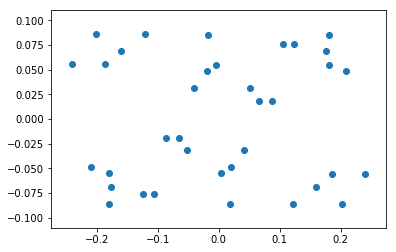

In [18]:
#print(w)
wpred = np.zeros((nm,nm))
wpred[i1:i2,:i1] = w[:,:i1]
wpred[i1:i2,i2:] = w[:,i1:]

plt.scatter(w0[i1:i2,i2:],wpred[i1:i2,i2:])